## Imports & Read Data

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("all_subs_windowed.csv")
df.head()

,subject,label,S1_D1_w1,S1_D1_w2,S1_D1_w3,S1_D2_w1,S1_D2_w2,S1_D2_w3,S2_D1_w1,S2_D1_w2,...,S9_D6_w3,S9_D8_w1,S9_D8_w2,S9_D8_w3,S10_D7_w1,S10_D7_w2,S10_D7_w3,S10_D8_w1,S10_D8_w2,S10_D8_w3
0,sub-101,3,-7.120779e-08,-1.591482e-08,4.037125e-08,1.059506e-07,-1.591482e-08,5.576864e-09,-5.745610e-08,1.158969e-09,...,-6.338075e-08,4.680183e-08,-6.375286e-08,1.427296e-08,4.680183e-08,-7.726111e-09,1.427296e-08,-7.726111e-09,1.427296e-08,-7.726111e-09
1,sub-101,1,-7.105098e-08,-1.428847e-07,-1.661490e-07,-1.067971e-07,-1.428847e-07,-1.549473e-07,-1.100738e-07,-9.783376e-08,...,-9.825674e-08,-1.156452e-07,-1.293089e-07,-1.468958e-07,-1.156452e-07,-1.101812e-07,-1.468958e-07,-1.101812e-07,-1.468958e-07,-1.101812e-07
2,sub-101,4,6.854295e-08,1.563502e-07,1.207582e-07,1.066198e-07,1.563502e-07,1.385606e-07,1.212980e-07,4.591666e-08,...,4.139978e-08,2.738268e-08,7.855582e-08,1.718898e-08,2.738268e-08,4.968935e-09,1.718898e-08,4.968935e-09,1.718898e-08,4.968935e-09
3,sub-101,2,1.206235e-07,1.431428e-07,2.246828e-08,2.433219e-08,1.431428e-07,1.236011e-07,1.035702e-07,1.868319e-09,...,-1.115965e-07,-2.759947e-08,-1.808735e-07,5.235214e-08,-2.759947e-08,1.151776e-08,5.235214e-08,1.151776e-08,5.235214e-08,1.151776e-08
4,sub-101,3,-1.319688e-07,-1.376738e-07,-2.001670e-07,-1.707070e-07,-1.376738e-07,-6.784068e-08,-1.378276e-07,-6.926143e-08,...,-1.588279e-07,-1.109203e-07,-2.869832e-07,-1.373283e-07,-1.109203e-07,-1.356308e-07,-1.373283e-07,-1.356308e-07,-1.373283e-07,-1.356308e-07


## EDA

In [49]:
df['subject'].value_counts()

subject
sub-101    40
sub-105    40
sub-148    40
sub-147    40
sub-146    40
sub-145    40
sub-144    40
sub-143    40
sub-142    40
sub-140    40
sub-139    40
sub-134    40
sub-133    40
sub-131    40
sub-130    40
sub-129    40
sub-127    40
sub-125    40
sub-124    40
sub-123    40
sub-121    40
sub-120    40
sub-119    40
sub-113    40
sub-112    40
sub-109    40
sub-108    40
sub-107    40
sub-149    40
sub-126    23
sub-141    20
Name: count, dtype: int64

In [53]:
def color_correlation2(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.9 and val < 0.99999 or val <= -0.8 and val > -0.99999:
        color = 'red'
    elif val < 0.9 and val >= 0.3 or val > -0.8 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color

df.select_dtypes('number').corr().style.applymap(color_correlation2)

# Featurların kendi arasındaki corr. -0.90, +0.90 'dan büyük olan değerleri istediğimiz renkte göstermesi kullanıyoruz.

C:\Users\humag\AppData\Local\Temp\ipykernel_26188\2900319162.py:17: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df.select_dtypes('number').corr().style.applymap(color_correlation2)


,label,S1_D1_w1,S1_D1_w2,S1_D1_w3,S1_D2_w1,S1_D2_w2,S1_D2_w3,S2_D1_w1,S2_D1_w2,S2_D1_w3,S2_D3_w1,S2_D3_w2,S2_D3_w3,S3_D1_w1,S3_D1_w2,S3_D1_w3,S3_D2_w1,S3_D2_w2,S3_D2_w3,S3_D3_w1,S3_D3_w2,S3_D3_w3,S3_D4_w1,S3_D4_w2,S3_D4_w3,S4_D2_w1,S4_D2_w2,S4_D2_w3,S4_D4_w1,S4_D4_w2,S4_D4_w3,S5_D3_w1,S5_D3_w2,S5_D3_w3,S5_D4_w1,S5_D4_w2,S5_D4_w3,S6_D5_w1,S6_D5_w2,S6_D5_w3,S6_D6_w1,S6_D6_w2,S6_D6_w3,S7_D5_w1,S7_D5_w2,S7_D5_w3,S7_D7_w1,S7_D7_w2,S7_D7_w3,S8_D5_w1,S8_D5_w2,S8_D5_w3,S8_D6_w1,S8_D6_w2,S8_D6_w3,S8_D7_w1,S8_D7_w2,S8_D7_w3,S8_D8_w1,S8_D8_w2,S8_D8_w3,S9_D6_w1,S9_D6_w2,S9_D6_w3,S9_D8_w1,S9_D8_w2,S9_D8_w3,S10_D7_w1,S10_D7_w2,S10_D7_w3,S10_D8_w1,S10_D8_w2,S10_D8_w3
label,1.000000,0.040453,0.024380,0.054440,-0.011104,0.009437,-0.007578,0.036024,0.006528,-0.001148,-0.003793,-0.002530,0.001196,0.051021,0.019264,0.024911,-0.024574,0.022925,0.018236,0.017002,-0.005599,0.014820,0.000953,-0.027719,-0.006166,0.052883,0.036834,0.049187,-0.010941,0.054618,-0.010023,0.033102,0.034547,-0.001515,0.022309,-0.017985,0.025360,0.069634,0.056773,0.034563,0.001035,0.057887,0.037738,0.050053,0.002445,0.037526,0.029207,-0.007253,0.031670,0.028905,0.018666,0.023892,-0.017514,0.036229,-0.013763,0.014991,0.026579,-0.003023,-0.002894,-0.018797,0.011365,0.043907,0.030679,0.018267,-0.002793,0.033613,0.031123,0.029249,0.000709,0.025892,0.015077,-0.014246,0.005154
S1_D1_w1,0.040453,1.000000,0.854205,0.570144,0.394173,0.799948,0.324822,0.814541,0.748191,0.290229,0.720844,0.225124,0.731647,0.836582,0.805541,0.572703,0.392662,0.777490,0.679788,0.694514,0.467814,0.683278,0.633452,0.534092,0.648788,0.722253,0.595739,0.350312,0.210821,0.521495,0.226906,0.556893,0.497831,0.195985,0.467482,0.141625,0.467644,0.573848,0.542834,0.315823,0.172842,0.520387,0.452224,0.450427,0.276647,0.438146,0.396201,0.258527,0.413011,0.602359,0.518742,0.312772,0.171875,0.436417,0.209457,0.478545,0.411124,0.192466,0.401911,0.132233,0.400056,0.488820,0.463059,0.293958,0.171994,0.444845,0.398057,0.385627,0.282189,0.410668,0.370321,0.230907,0.373495
S1_D1_w2,0.024380,0.854205,1.000000,0.450155,0.355710,0.815629,0.339739,0.885307,0.806923,0.316110,0.783317,0.242991,0.773657,0.829580,0.861972,0.590843,0.424480,0.817239,0.793641,0.754778,0.518342,0.783572,0.714286,0.568008,0.703112,0.565951,0.704716,0.260201,0.173647,0.518977,0.227994,0.595094,0.533639,0.205388,0.519354,0.145744,0.488671,0.542832,0.580045,0.293310,0.158243,0.531224,0.530740,0.468781,0.299565,0.511179,0.436813,0.250033,0.442293,0.448429,0.597834,0.225484,0.123831,0.420968,0.198137,0.501216,0.434176,0.188413,0.442734,0.124941,0.412839,0.435618,0.470024,0.257960,0.137703,0.432942,0.437633,0.372613,0.278073,0.440075,0.391152,0.185715,0.385354
S1_D1_w3,0.054440,0.570144,0.450155,1.000000,0.597736,0.546260,0.137922,0.484000,0.433141,0.118638,0.423836,0.132311,0.465736,0.490141,0.454833,0.499378,0.409316,0.459463,0.251727,0.407779,0.242280,0.264346,0.243676,0.363726,0.260480,0.401172,0.299044,0.806349,0.461864,0.372234,0.068177,0.337882,0.268655,0.050635,0.242887,0.096933,0.297052,0.350272,0.322526,0.402312,0.288278,0.328330,0.145226,0.311240,0.175329,0.144458,0.132809,0.259698,0.158787,0.297226,0.230877,0.676677,0.386680,0.296151,0.049142,0.263744,0.186923,0.037462,0.169974,0.078070,0.214538,0.271379,0.247345,0.349282,0.258839,0.256038,0.128650,0.252885,0.194011,0.143111,0.125900,0.226617,0.150843
S1_D2_w1,-0.011104,0.394173,0.355710,0.597736,1.000000,0.427572,0.064560,0.400717,0.355833,0.052867,0.339824,0.065577,0.362232,0.353183,0.344532,0.345559,0.439170,0.356329,0.227147,0.346471,0.244604,0.214356,0.199886,0.397194,0.232864,0.278745,0.253216,0.486504,0.823934,0.290059,0.015719,0.310678,0.262688,0.005833,0.227250,0.045731,0.260028,0.270153,0.258260,0.288256,0.327772,0.266865,0.165073,0.284660,0.195858,0.147674,0.125262,0.311720,0.162165,0.225994,0.225930,0.433691,0.709619,0.253374,0.012563,0.264036,0.224508,0.007973,0.199162,0.045291,0.220345,0.239352,0.233796,0.282297,0.315025,0.255780,0.164127,0.273455,0.227456,0.159664,0.150902,0.303433

## change labels for ML 

In [3]:
df['label'] = df['label'] - 1
df.head()

,subject,label,S1_D1_w1,S1_D1_w2,S1_D1_w3,S1_D2_w1,S1_D2_w2,S1_D2_w3,S2_D1_w1,S2_D1_w2,...,S9_D6_w3,S9_D8_w1,S9_D8_w2,S9_D8_w3,S10_D7_w1,S10_D7_w2,S10_D7_w3,S10_D8_w1,S10_D8_w2,S10_D8_w3
0,sub-101,2,-7.120779e-08,-1.591482e-08,4.037125e-08,1.059506e-07,-1.591482e-08,5.576864e-09,-5.745610e-08,1.158969e-09,...,-6.338075e-08,4.680183e-08,-6.375286e-08,1.427296e-08,4.680183e-08,-7.726111e-09,1.427296e-08,-7.726111e-09,1.427296e-08,-7.726111e-09
1,sub-101,0,-7.105098e-08,-1.428847e-07,-1.661490e-07,-1.067971e-07,-1.428847e-07,-1.549473e-07,-1.100738e-07,-9.783376e-08,...,-9.825674e-08,-1.156452e-07,-1.293089e-07,-1.468958e-07,-1.156452e-07,-1.101812e-07,-1.468958e-07,-1.101812e-07,-1.468958e-07,-1.101812e-07
2,sub-101,3,6.854295e-08,1.563502e-07,1.207582e-07,1.066198e-07,1.563502e-07,1.385606e-07,1.212980e-07,4.591666e-08,...,4.139978e-08,2.738268e-08,7.855582e-08,1.718898e-08,2.738268e-08,4.968935e-09,1.718898e-08,4.968935e-09,1.718898e-08,4.968935e-09
3,sub-101,1,1.206235e-07,1.431428e-07,2.246828e-08,2.433219e-08,1.431428e-07,1.236011e-07,1.035702e-07,1.868319e-09,...,-1.115965e-07,-2.759947e-08,-1.808735e-07,5.235214e-08,-2.759947e-08,1.151776e-08,5.235214e-08,1.151776e-08,5.235214e-08,1.151776e-08
4,sub-101,2,-1.319688e-07,-1.376738e-07,-2.001670e-07,-1.707070e-07,-1.376738e-07,-6.784068e-08,-1.378276e-07,-6.926143e-08,...,-1.588279e-07,-1.109203e-07,-2.869832e-07,-1.373283e-07,-1.109203e-07,-1.356308e-07,-1.373283e-07,-1.356308e-07,-1.373283e-07,-1.356308e-07


## Exclude subject 141

Excluding either subject 131 or 141 for app testing. I chose these subjects because sub-131 has 23 trials and sub-141 has 20. All other subjects have 40 trials/events. So the training will be with more data.

In [4]:
df = df[df['subject'] != 'sub-141']
df.head()

## train test split (6 tests)

In [6]:
from sklearn.model_selection import train_test_split

# Get all unique subject IDs
subjects = df['subject'].unique()
subjects

array(['sub-101', 'sub-105', 'sub-107', 'sub-108', 'sub-109', 'sub-112',
       'sub-113', 'sub-119', 'sub-120', 'sub-121', 'sub-123', 'sub-124',
       'sub-125', 'sub-126', 'sub-127', 'sub-129', 'sub-130', 'sub-131',
       'sub-133', 'sub-134', 'sub-139', 'sub-140', 'sub-142', 'sub-143',
       'sub-144', 'sub-145', 'sub-146', 'sub-147', 'sub-148', 'sub-149'],
      dtype=object)

In [7]:
# do subject level split

# Randomly pick 6 subjects for test
np.random.seed(42)  # for reproducibility
test_subjects = np.random.choice(subjects, size=6, replace=False)
train_subjects = [s for s in subjects if s not in test_subjects]

print("Test subjects:", test_subjects)

Test subjects: ['sub-147' 'sub-129' 'sub-143' 'sub-131' 'sub-120' 'sub-121']


In [8]:
# Split to x_train, x_test, y_train and y_test
train_df = df[df['subject'].isin(train_subjects)]
test_df = df[df['subject'].isin(test_subjects)]

# Separate Features and Labels
X_train = train_df.drop(['label', 'subject'], axis=1)
y_train = train_df['label']

X_test = test_df.drop(['label', 'subject'], axis=1)
y_test = test_df['label']

In [114]:
X_train.head()

,S1_D1_w1,S1_D1_w2,S1_D1_w3,S1_D2_w1,S1_D2_w2,S1_D2_w3,S2_D1_w1,S2_D1_w2,S2_D1_w3,S2_D3_w1,S2_D3_w2,S2_D3_w3,S3_D1_w1,S3_D1_w2,S3_D1_w3,S3_D2_w1,S3_D2_w2,S3_D2_w3,S3_D3_w1,S3_D3_w2,S3_D3_w3,S3_D4_w1,S3_D4_w2,S3_D4_w3,S4_D2_w1,S4_D2_w2,S4_D2_w3,S4_D4_w1,S4_D4_w2,S4_D4_w3,S5_D3_w1,S5_D3_w2,S5_D3_w3,S5_D4_w1,S5_D4_w2,S5_D4_w3,S6_D5_w1,S6_D5_w2,S6_D5_w3,S6_D6_w1,S6_D6_w2,S6_D6_w3,S7_D5_w1,S7_D5_w2,S7_D5_w3,S7_D7_w1,S7_D7_w2,S7_D7_w3,S8_D5_w1,S8_D5_w2,S8_D5_w3,S8_D6_w1,S8_D6_w2,S8_D6_w3,S8_D7_w1,S8_D7_w2,S8_D7_w3,S8_D8_w1,S8_D8_w2,S8_D8_w3,S9_D6_w1,S9_D6_w2,S9_D6_w3,S9_D8_w1,S9_D8_w2,S9_D8_w3,S10_D7_w1,S10_D7_w2,S10_D7_w3,S10_D8_w1,S10_D8_w2,S10_D8_w3
0,-7.120779e-08,-1.591482e-08,4.037125e-08,1.059506e-07,-1.591482e-08,5.576864e-09,-5.745610e-08,1.158969e-09,3.863151e-08,3.938105e-08,7.768855e-09,1.425082e-08,-5.524322e-08,-4.475156e-08,-1.289823e-08,1.088916e-07,-4.475156e-08,7.897477e-09,1.088916e-07,-1.570836e-08,7.897477e-09,-1.570836e-08,7.897477e-09,-1.570836e-08,-7.274153e-08,3.015759e-08,4.543606e-08,8.542632e-08,3.015759e-08,3.758460e-08,-4.817683e-08,2.271835e-08,7.122959e-08,9.663326e-08,2.952304e-08,4.002735e-08,3.377514e-08,-5.924681e-09,-3.158123e-08,8.319233e-08,-5.924681e-09,7.081202e-08,8.319233e-08,3.612793e-08,7.081202e-08,3.612793e-08,7.081202e-08,3.612793e-08,-7.629617e-08,-1.742385e-08,2.001804e-09,3.435658e-08,-1.742385e-08,-1.906358e-08,-1.143720e-07,-5.064373e-08,1.213834e-09,6.806839e-09,-5.133304e-08,-5.558204e-08,-1.890946e-08,-6.375286e-08,-6.338075e-08,4.680183e-08,-6.375286e-08,1.427296e-08,4.680183e-08,-7.726111e-09,1.427296e-08,-7.726111e-09,1.427296e-08,-7.726111e-09
1,-7.105098e-08,-1.428847e-07,-1.661490e-07,-1.067971e-07,-1.428847e-07,-1.549473e-07,-1.100738e-07,-9.783376e-08,-1.773374e-07,-9.094488e-08,-8.595871e-08,-8.048996e-08,-9.530875e-08,-7.738329e-08,-7.265711e-08,-1.484282e-07,-7.738329e-08,-1.555044e-07,-1.484282e-07,-5.873374e-08,-1.555044e-07,-5.873374e-08,-1.555044e-07,-5.873374e-08,-2.169403e-07,-3.462418e-07,-2.960836e-07,-2.240267e-07,-3.462418e-07,-3.193954e-07,-2.701730e-07,-1.031725e-07,-3.344812e-07,-2.645773e-07,-2.231883e-07,-2.173622e-07,-3.636128e-07,-2.589025e-07,-1.845544e-07,-2.158853e-07,-2.589025e-07,-3.188579e-07,-2.158853e-07,-2.108302e-07,-3.188579e-07,-2.108302e-07,-3.188579e-07,-2.108302e-07,-1.243527e-07,-1.582178e-07,-2.149240e-07,-1.570466e-07,-1.582178e-07,-1.747449e-07,-1.461947e-07,-3.970967e-08,-1.404347e-07,-1.414960e-07,-1.122240e-07,-1.147989e-07,-1.382559e-07,-1.293089e-07,-9.825674e-08,-1.156452e-07,-1.293089e-07,-1.468958e-07,-1.156452e-07,-1.101812e-07,-1.468958e-07,-1.101812e-07,-1.468958e-07,-1.101812e-07
2,6.854295e-08,1.563502e-07,1.207582e-07,1.066198e-07,1.563502e-07,1.385606e-07,1.212980e-07,4.591666e-08,1.252554e-07,1.350646e-07,6.578146e-08,1.199190e-07,1.045004e-07,1.789360e-07,1.237139e-07,7.215523e-08,1.789360e-07,1.392406e-07,7.215523e-08,1.080434e-07,1.392406e-07,1.080434e-07,1.392406e-07,1.080434e-07,-4.233455e-08,-1.082687e-07,4.155229e-08,5.811049e-08,-1.082687e-07,-9.283569e-08,-2.193308e-08,2.999166e-08,-1.223245e-07,-1.095733e-07,-5.550321e-08,-9.656182e-08,-1.516982e-07,9.599299e-08,2.949635e-08,-1.284701e-08,9.599299e-08,-1.030345e-07,-1.284701e-08,-4.752630e-08,-1.030345e-07,-4.752630e-08,-1.030345e-07,-4.752630e-08,-5.168071e-08,-4.268574e-08,4.663472e-08,3.576296e-08,-4.268574e-08,-3.099188e-08,-7.399158e-09,3.677782e-08,-7.429087e-09,-5.766669e-08,-2.848575e-08,-5.366931e-08,-1.397104e-07,7.855582e-08,4.139978e-08,2.738268e-08,7.855582e-08,1.718898e-08,2.738268e-08,4.968935e-09,1.718898e-08,4.968935e-09,1.718898e-08,4.968935e-09
3,1.206235e-07,1.431428e-07,2.246828e-08,2.433219e-08,1.431428e-07,1.236011e-07,1.035702e-07,1.868319e-09,1.944780e-07,1.495827e-07,7.898355e-08,9.961012e-08,1.677314e-07,5.732860e-08,5.623948e-08,5.572116e-08,5.732860e-08,1.708694e-07,5.572116e-08,1.270245e-07,1.708694e-07,1.270245e-07,1.708694e-07,1.270245e-07,-4.815315e-08,-1.260933e-07,-1.924363e-07,-1.938829e-07,-1.260933e-07,-7.518198e-08,-1

In [115]:
y_train

0       2
1       0
2       3
3       1
4       2
       ..
1198    2
1199    1
1200    3
1201    0
1202    2
Name: label, Length: 943, dtype: int64

In [116]:
X_test.head()

,S1_D1_w1,S1_D1_w2,S1_D1_w3,S1_D2_w1,S1_D2_w2,S1_D2_w3,S2_D1_w1,S2_D1_w2,S2_D1_w3,S2_D3_w1,S2_D3_w2,S2_D3_w3,S3_D1_w1,S3_D1_w2,S3_D1_w3,S3_D2_w1,S3_D2_w2,S3_D2_w3,S3_D3_w1,S3_D3_w2,S3_D3_w3,S3_D4_w1,S3_D4_w2,S3_D4_w3,S4_D2_w1,S4_D2_w2,S4_D2_w3,S4_D4_w1,S4_D4_w2,S4_D4_w3,S5_D3_w1,S5_D3_w2,S5_D3_w3,S5_D4_w1,S5_D4_w2,S5_D4_w3,S6_D5_w1,S6_D5_w2,S6_D5_w3,S6_D6_w1,S6_D6_w2,S6_D6_w3,S7_D5_w1,S7_D5_w2,S7_D5_w3,S7_D7_w1,S7_D7_w2,S7_D7_w3,S8_D5_w1,S8_D5_w2,S8_D5_w3,S8_D6_w1,S8_D6_w2,S8_D6_w3,S8_D7_w1,S8_D7_w2,S8_D7_w3,S8_D8_w1,S8_D8_w2,S8_D8_w3,S9_D6_w1,S9_D6_w2,S9_D6_w3,S9_D8_w1,S9_D8_w2,S9_D8_w3,S10_D7_w1,S10_D7_w2,S10_D7_w3,S10_D8_w1,S10_D8_w2,S10_D8_w3
320,-5.082183e-08,-6.764360e-08,-8.669147e-08,-5.346115e-08,6.316209e-09,-1.261079e-07,2.438582e-07,-1.203357e-07,-5.087334e-08,-4.729597e-08,-5.087334e-08,1.725079e-08,-6.453139e-08,-2.333575e-08,3.718363e-08,1.575385e-07,-8.033933e-09,-7.794083e-08,-1.017590e-07,-8.493254e-08,-1.098515e-07,-3.874476e-08,-4.760805e-08,-7.738234e-08,-3.418305e-07,-4.546087e-07,-2.914450e-07,-2.864088e-07,-1.302187e-07,-4.153349e-07,-1.071383e-07,-3.373928e-07,-3.554982e-07,-2.660461e-07,-3.554982e-07,-2.459415e-07,-5.161887e-07,-4.715649e-07,-4.123434e-07,-1.960251e-07,-3.500799e-07,-5.200786e-07,-5.105202e-07,-4.801917e-07,-5.975003e-07,-3.848624e-07,-3.214463e-07,-4.066302e-07,-2.404833e-07,-3.160411e-07,-3.441467e-07,-3.725440e-07,-9.110124e-08,-3.518794e-07,-7.902688e-08,-2.314933e-07,-2.695793e-07,-2.033841e-07,-2.695793e-07,-1.520517e-07,-4.173736e-07,-3.816325e-07,-2.213858e-07,-1.021186e-07,-1.877901e-07,-3.527104e-07,-3.419789e-07,-3.161425e-07,-4.391635e-07,-2.759112e-07,-2.280272e-07,-3.069827e-07
321,-2.123131e-07,-5.905113e-07,-7.197230e-08,5.013211e-08,4.234506e-08,3.088552e-08,-4.404138e-07,-7.814616e-08,-3.067422e-07,-3.344280e-07,-3.067422e-07,-5.898895e-08,-7.953964e-07,-6.916565e-07,-4.562773e-07,-9.701676e-08,-4.298547e-07,-5.057382e-07,-2.561910e-07,-4.380558e-07,-4.278227e-07,-4.112769e-07,-1.164825e-07,-2.615404e-07,-1.841584e-07,-5.778380e-07,1.137920e-08,2.733545e-07,2.654398e-09,1.419940e-08,-3.082478e-07,4.052278e-09,-2.899125e-07,-3.081381e-07,-2.899125e-07,-2.158142e-08,-8.081549e-07,-6.582280e-07,-3.243571e-07,4.585261e-08,-4.332662e-07,-5.348246e-07,-3.064987e-07,-4.092611e-07,-4.001181e-07,-3.708331e-07,-1.335354e-07,-2.060553e-07,1.406390e-07,-3.733295e-08,7.024392e-08,2.958714e-07,1.489834e-07,3.055781e-07,-5.294210e-08,2.391260e-07,5.547450e-08,-4.042985e-08,5.547450e-08,4.386973e-08,-1.421371e-07,-4.124767e-08,7.260146e-08,2.502885e-07,5.352976e-08,4.468300e-08,1.711352e-07,8.004928e-08,1.513184e-07,1.493930e-08,1.651694e-07,1.195666e-07
322,-4.992912e-07,-7.173548e-07,1.041649e-07,7.122956e-08,-3.893366e-07,-6.867808e-07,-5.861768e-07,-4.601688e-07,-5.187050e-07,-3.506176e-07,-5.187050e-07,-2.794544e-07,-9.364262e-07,-8.917165e-07,-7.467285e-07,-3.820023e-07,-7.903391e-07,-8.093061e-07,-7.962583e-07,-6.894093e-07,-7.529523e-07,-5.290560e-07,-4.744758e-07,-4.770485e-07,-3.224852e-07,-4.045667e-07,1.053790e-07,1.192733e-07,-2.534203e-07,-4.360971e-07,-4.053852e-07,-3.036332e-07,-2.662409e-07,-1.982919e-07,-2.662409e-07,-1.321375e-07,-5.701057e-07,-5.379363e-07,-4.196222e-07,-1.324735e-07,-5.309582e-07,-5.241010e-07,-6.038233e-07,-4.064561e-07,-4.569265e-07,-1.886041e-07,-3.281733e-07,-2.217166e-07,-3.137664e-07,-3.965456e-07,-1.459519e-08,-3.661475e-09,-2.155680e-07,-3.550799e-07,-4.279593e-07,-2.742316e-07,-2.268571e-07,-1.891226e-07,-2.268571e-07,-1.229626e-07,-5.309318e-07,-4.855111e-07,-3.692510e-07,-1.345359e-07,-3.799342e-07,-3.600089e-07,-3.405423e-07,-2.848356e-07,-2.893362e-07,-1.242587e-07,-1.712624e-07,-1.666496e-07
323,-3.582311e-07,-4.894249e-07,-2.337664e-08,-1.218728e-09,-1.860652e-07,-4.515420e-07,-4.338717e-07,-3.496347e-07,-3.365114e-07,-2.628349e-07,-3.365114e-07,-3.067341e-07,-6.213799e-07,-5.713741e-07,-4.924682e-07,-3.390579e-07,-4.915166e-07,-6.588563e-07,-6.299126e-07,-5.140467e-07,-6.759956e-07,-3.722813e-07,-4.401142e-07,-4.257493e-07,1.4890

In [117]:
y_test

320     2
321     0
322     3
323     1
324     2
       ..
1118    0
1119    0
1120    1
1121    3
1122    2
Name: label, Length: 240, dtype: int64

## Scaling - z score

In [9]:
# scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)    

## Models (Base)

In [119]:
# method for evaluating results: shows all metrics and confusion matrix
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [126]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_lr = LogisticRegression(multi_class='multinomial', max_iter=500, random_state=42)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.25833333333333336


In [122]:
eval_metric(model_lr, X_train, y_train, X_test, y_test)

Test_Set
[[26  6 14 14]
 [20 10  8 22]
 [22 12 10 16]
 [20  9 15 16]]
              precision    recall  f1-score   support

           0       0.30      0.43      0.35        60
           1       0.27      0.17      0.21        60
           2       0.21      0.17      0.19        60
           3       0.24      0.27      0.25        60

    accuracy                           0.26       240
   macro avg       0.25      0.26      0.25       240
weighted avg       0.25      0.26      0.25       240


Train_Set
[[ 94  34  56  51]
 [ 40 104  39  53]
 [ 40  39 112  45]
 [ 48  47  41 100]]
              precision    recall  f1-score   support

           0       0.42      0.40      0.41       235
           1       0.46      0.44      0.45       236
           2       0.45      0.47      0.46       236
           3       0.40      0.42      0.41       236

    accuracy                           0.43       943
   macro avg       0.44      0.43      0.43       943
weighted avg       0.44    

### Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.23333333333333334


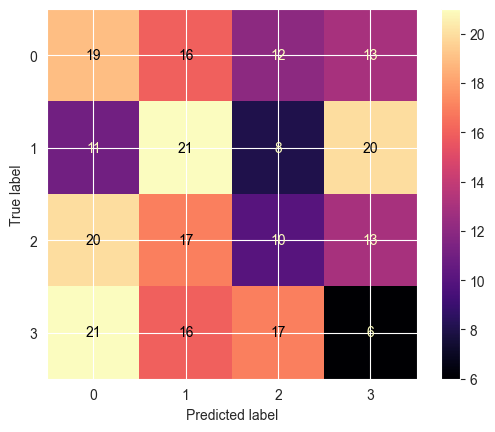

In [125]:
ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test, cmap="magma");

In [124]:
eval_metric(model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[19 16 12 13]
 [11 21  8 20]
 [20 17 10 13]
 [21 16 17  6]]
              precision    recall  f1-score   support

           0       0.27      0.32      0.29        60
           1       0.30      0.35      0.32        60
           2       0.21      0.17      0.19        60
           3       0.12      0.10      0.11        60

    accuracy                           0.23       240
   macro avg       0.22      0.23      0.23       240
weighted avg       0.22      0.23      0.23       240


Train_Set
[[235   0   0   0]
 [  0 236   0   0]
 [  0   0 236   0]
 [  0   0   0 236]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       236
           2       1.00      1.00      1.00       236
           3       1.00      1.00      1.00       236

    accuracy                           1.00       943
   macro avg       1.00      1.00      1.00       943
weighted avg       1.00    

### XGBoost

In [11]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

C:\Users\humag\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:43:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.3125


In [12]:
# check overfit
train_acc = model_xgb.score(X_train, y_train)
test_acc = model_xgb.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

Train Accuracy: 1.000
Test Accuracy: 0.312


In [129]:
eval_metric(model_xgb, X_train, y_train, X_test, y_test)

Test_Set
[[25 13 10 12]
 [10 25  7 18]
 [17 15 13 15]
 [23 19  6 12]]
              precision    recall  f1-score   support

           0       0.33      0.42      0.37        60
           1       0.35      0.42      0.38        60
           2       0.36      0.22      0.27        60
           3       0.21      0.20      0.21        60

    accuracy                           0.31       240
   macro avg       0.31      0.31      0.31       240
weighted avg       0.31      0.31      0.31       240


Train_Set
[[235   0   0   0]
 [  0 236   0   0]
 [  0   0 236   0]
 [  0   0   0 236]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       236
           2       1.00      1.00      1.00       236
           3       1.00      1.00      1.00       236

    accuracy                           1.00       943
   macro avg       1.00      1.00      1.00       943
weighted avg       1.00    

### LDA

In [131]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

y_pred_lda = lda.predict(X_test)

print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))

LDA Accuracy: 0.25416666666666665


In [132]:
eval_metric(lda, X_train, y_train, X_test, y_test)

Test_Set
[[24  7 14 15]
 [17  9 12 22]
 [19 15  9 17]
 [15  9 17 19]]
              precision    recall  f1-score   support

           0       0.32      0.40      0.36        60
           1       0.23      0.15      0.18        60
           2       0.17      0.15      0.16        60
           3       0.26      0.32      0.29        60

    accuracy                           0.25       240
   macro avg       0.24      0.25      0.25       240
weighted avg       0.24      0.25      0.25       240


Train_Set
[[ 97  34  53  51]
 [ 40 104  42  50]
 [ 43  41 106  46]
 [ 44  47  39 106]]
              precision    recall  f1-score   support

           0       0.43      0.41      0.42       235
           1       0.46      0.44      0.45       236
           2       0.44      0.45      0.45       236
           3       0.42      0.45      0.43       236

    accuracy                           0.44       943
   macro avg       0.44      0.44      0.44       943
weighted avg       0.44    

In [134]:
# check overfit
train_acc = lda.score(X_train, y_train)
test_acc = lda.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Train Accuracy: 0.44
Test Accuracy: 0.25


### CatBoost

In [140]:
from catboost import CatBoostClassifier

model_cat2 = CatBoostClassifier(loss_function='MultiClass', verbose=0)

model_cat2.fit(X_train, y_train)

y_pred_cat = model_cat2.predict(X_test)

print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))


CatBoost Accuracy: 0.25833333333333336


In [141]:
# check overfit
train_acc = model_cat2.score(X_train, y_train)
test_acc = model_cat2.score(X_test, y_test) 

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Train Accuracy: 1.00
Test Accuracy: 0.26


In [137]:
model_cat = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    verbose=0, 
    random_state=42
)

# train
model_cat.fit(X_train, y_train)

# predict
y_pred_cat = model_cat.predict(X_test)

print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))


CatBoost Accuracy: 0.25


In [138]:
# check overfit
train_acc = model_cat.score(X_train, y_train)
test_acc = model_cat.score(X_test, y_test) 

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Train Accuracy: 0.90
Test Accuracy: 0.25


### LightGBM

In [142]:
from lightgbm import LGBMClassifier

# model
lgbm = LGBMClassifier(random_state=42)

# Train
lgbm.fit(X_train, y_train)

# Predict
y_pred_lgbm = lgbm.predict(X_test)

# Accuracy
print("LGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003814 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18360
[LightGBM] [Info] Number of data points in the train set: 943, number of used features: 72
[LightGBM] [Info] Start training from score -1.389481
[LightGBM] [Info] Start training from score -1.385234
[LightGBM] [Info] Start training from score -1.385234
[LightGBM] [Info] Start training from score -1.385234
LGBM Accuracy: 0.25833333333333336


In [143]:
# check overfit
train_acc = lgbm.score(X_train, y_train)
test_acc = lgbm.score(X_test, y_test) 

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Train Accuracy: 1.00
Test Accuracy: 0.26


### NN

In [168]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import accuracy_score

# Convert features to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Convert labels to tensors (FIXED)
y_train_tensor = torch.tensor(np.array(y_train), dtype=torch.long)
y_test_tensor = torch.tensor(np.array(y_test), dtype=torch.long)

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Define the NN model
class NEMONet(nn.Module):
    def __init__(self, input_dim=72, hidden_dim=64, output_dim=4):
        super(NEMONet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.model(x)

# Instantiate model, loss function, optimizer
model = NEMONet(input_dim=X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

n_epochs = 70   # 70 -->> 0.27  0.3
for epoch in range(n_epochs):
    # ---------- Training ----------
    model.train()
    train_preds, train_labels = [], []
    for X_batch, y_batch in train_loader:
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Store predictions for training accuracy
        _, preds = torch.max(outputs, 1)
        train_preds.extend(preds.numpy())
        train_labels.extend(y_batch.numpy())

    train_acc = accuracy_score(train_labels, train_preds)

    # ---------- Evaluation ----------
    model.eval()
    test_preds, test_labels = [], []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)
            test_preds.extend(preds.numpy())
            test_labels.extend(y_batch.numpy())

    test_acc = accuracy_score(test_labels, test_preds)

    # ---------- Logging ----------
    print(f"Epoch {epoch+1}/{n_epochs} | Loss: {loss.item():.4f} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")


# Accuracy
print("Neural Net Accuracy:", accuracy_score(test_labels, test_preds))


Epoch 1/70 | Loss: 1.3631 | Train Acc: 0.2747 | Test Acc: 0.2208
Epoch 2/70 | Loss: 1.4733 | Train Acc: 0.2990 | Test Acc: 0.2292
Epoch 3/70 | Loss: 1.3628 | Train Acc: 0.3139 | Test Acc: 0.2417
Epoch 4/70 | Loss: 1.4008 | Train Acc: 0.3245 | Test Acc: 0.2292
Epoch 5/70 | Loss: 1.3455 | Train Acc: 0.3372 | Test Acc: 0.2625
Epoch 6/70 | Loss: 1.3497 | Train Acc: 0.3521 | Test Acc: 0.2542
Epoch 7/70 | Loss: 1.3731 | Train Acc: 0.3637 | Test Acc: 0.2333
Epoch 8/70 | Loss: 1.3676 | Train Acc: 0.3712 | Test Acc: 0.2542
Epoch 9/70 | Loss: 1.2511 | Train Acc: 0.3531 | Test Acc: 0.2417
Epoch 10/70 | Loss: 1.2067 | Train Acc: 0.3733 | Test Acc: 0.2667
Epoch 11/70 | Loss: 1.2872 | Train Acc: 0.3818 | Test Acc: 0.2583
Epoch 12/70 | Loss: 1.3960 | Train Acc: 0.3977 | Test Acc: 0.2625
Epoch 13/70 | Loss: 1.1901 | Train Acc: 0.4093 | Test Acc: 0.2292
Epoch 14/70 | Loss: 1.2224 | Train Acc: 0.3913 | Test Acc: 0.2333
Epoch 15/70 | Loss: 1.2482 | Train Acc: 0.3913 | Test Acc: 0.2458
Epoch 16/70 | Loss:

# Parameter Tuning

## Optuna LGBM

In [190]:
import optuna
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import numpy as np
from lightgbm import early_stopping, log_evaluation

def objective(trial):
    params = {
        'objective': 'multiclass',
        'num_class': 4, 
        'metric': 'multi_logloss',
        'boosting_type': 'gbdt',
        'verbosity': -1,
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 16, 128),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0), # changed from 0.6
        'lambda_l1': trial.suggest_float('lambda_l1', 0.0, 5.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 0.0, 5.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'max_bin': trial.suggest_int('max_bin', 64, 255),
    }

    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_test, label=y_test)

    model = lgb.train(params,
                      train_data,
                      valid_sets=[valid_data],
                      num_boost_round=1000,
                      callbacks=[
                          early_stopping(stopping_rounds=30),
                          log_evaluation(0)  # turn this on if you want to log every X rounds
                      ])

    y_pred = model.predict(X_test)
    y_pred_class = np.argmax(y_pred, axis=1)
    acc = accuracy_score(y_test, y_pred_class)
    return acc

In [191]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best accuracy:", study.best_value)
print("Best hyperparameters:", study.best_trial.params)

[I 2025-07-21 23:11:28,529] A new study created in memory with name: no-name-49a87dbb-6e56-4db9-8ae2-967aafcfe604


Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:28,888] Trial 0 finished with value: 0.2875 and parameters: {'max_depth': 9, 'num_leaves': 84, 'learning_rate': 0.021229052554041252, 'feature_fraction': 0.7182872073586033, 'bagging_fraction': 0.753320728121787, 'lambda_l1': 2.760573284571172, 'lambda_l2': 0.9302396170542393, 'min_child_samples': 33, 'max_bin': 64}. Best is trial 0 with value: 0.2875.


Early stopping, best iteration is:
[20]	valid_0's multi_logloss: 1.38002
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[29]	valid_0's multi_logloss: 1.38608


[I 2025-07-21 23:11:29,096] Trial 1 finished with value: 0.25833333333333336 and parameters: {'max_depth': 9, 'num_leaves': 83, 'learning_rate': 0.002097413575866715, 'feature_fraction': 0.6412872994063031, 'bagging_fraction': 0.8427691484483009, 'lambda_l1': 0.3911409198362875, 'lambda_l2': 4.558418194839875, 'min_child_samples': 88, 'max_bin': 180}. Best is trial 0 with value: 0.2875.


Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:29,403] Trial 2 finished with value: 0.2708333333333333 and parameters: {'max_depth': 10, 'num_leaves': 108, 'learning_rate': 0.023930909220782403, 'feature_fraction': 0.9631706658172555, 'bagging_fraction': 0.6102619243112505, 'lambda_l1': 2.863000135611264, 'lambda_l2': 1.6067413905140153, 'min_child_samples': 24, 'max_bin': 90}. Best is trial 0 with value: 0.2875.


Early stopping, best iteration is:
[8]	valid_0's multi_logloss: 1.38534
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:30,055] Trial 3 finished with value: 0.2833333333333333 and parameters: {'max_depth': 10, 'num_leaves': 34, 'learning_rate': 0.012665224346328866, 'feature_fraction': 0.8353446894146802, 'bagging_fraction': 0.6958170149844924, 'lambda_l1': 4.299783082048068, 'lambda_l2': 3.0216424715054275, 'min_child_samples': 14, 'max_bin': 250}. Best is trial 0 with value: 0.2875.


Early stopping, best iteration is:
[20]	valid_0's multi_logloss: 1.38456
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:30,293] Trial 4 finished with value: 0.24166666666666667 and parameters: {'max_depth': 6, 'num_leaves': 19, 'learning_rate': 0.0026779175968731014, 'feature_fraction': 0.7158523939406058, 'bagging_fraction': 0.5387832479048998, 'lambda_l1': 0.860598274334195, 'lambda_l2': 3.7399835062124485, 'min_child_samples': 72, 'max_bin': 108}. Best is trial 0 with value: 0.2875.


Early stopping, best iteration is:
[24]	valid_0's multi_logloss: 1.38528
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:30,878] Trial 5 finished with value: 0.25833333333333336 and parameters: {'max_depth': 3, 'num_leaves': 128, 'learning_rate': 0.002717601648676746, 'feature_fraction': 0.6002722295960471, 'bagging_fraction': 0.6124654365635118, 'lambda_l1': 4.474885451655774, 'lambda_l2': 1.2554847720522933, 'min_child_samples': 47, 'max_bin': 232}. Best is trial 0 with value: 0.2875.


Early stopping, best iteration is:
[114]	valid_0's multi_logloss: 1.38461
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:31,279] Trial 6 finished with value: 0.26666666666666666 and parameters: {'max_depth': 4, 'num_leaves': 95, 'learning_rate': 0.052567598126659856, 'feature_fraction': 0.7597502354765592, 'bagging_fraction': 0.8593533923507135, 'lambda_l1': 4.471331967467325, 'lambda_l2': 2.938776727723365, 'min_child_samples': 10, 'max_bin': 189}. Best is trial 0 with value: 0.2875.


Early stopping, best iteration is:
[10]	valid_0's multi_logloss: 1.38325
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:31,503] Trial 7 finished with value: 0.23333333333333334 and parameters: {'max_depth': 5, 'num_leaves': 119, 'learning_rate': 0.012090870986379664, 'feature_fraction': 0.9085961930256709, 'bagging_fraction': 0.6231792004324713, 'lambda_l1': 2.7702038772089255, 'lambda_l2': 2.7395091373707525, 'min_child_samples': 62, 'max_bin': 115}. Best is trial 0 with value: 0.2875.


Early stopping, best iteration is:
[9]	valid_0's multi_logloss: 1.38534
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:31,881] Trial 8 finished with value: 0.2125 and parameters: {'max_depth': 9, 'num_leaves': 109, 'learning_rate': 0.0016967937341423065, 'feature_fraction': 0.9964501370567616, 'bagging_fraction': 0.7835222638022639, 'lambda_l1': 0.35935282398071755, 'lambda_l2': 2.5632100546148324, 'min_child_samples': 28, 'max_bin': 70}. Best is trial 0 with value: 0.2875.


Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 1.3863
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:32,104] Trial 9 finished with value: 0.20833333333333334 and parameters: {'max_depth': 4, 'num_leaves': 103, 'learning_rate': 0.07403621615572357, 'feature_fraction': 0.649518888605401, 'bagging_fraction': 0.6871051977442488, 'lambda_l1': 1.7257529060892296, 'lambda_l2': 0.687151592300071, 'min_child_samples': 61, 'max_bin': 82}. Best is trial 0 with value: 0.2875.


Early stopping, best iteration is:
[2]	valid_0's multi_logloss: 1.38444
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:34,745] Trial 10 finished with value: 0.24166666666666667 and parameters: {'max_depth': 7, 'num_leaves': 58, 'learning_rate': 0.005358481028476228, 'feature_fraction': 0.852891945957536, 'bagging_fraction': 0.9867123782181628, 'lambda_l1': 1.8335589989536527, 'lambda_l2': 0.027551978139126465, 'min_child_samples': 42, 'max_bin': 146}. Best is trial 0 with value: 0.2875.


Early stopping, best iteration is:
[42]	valid_0's multi_logloss: 1.38352
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:37,935] Trial 11 finished with value: 0.26666666666666666 and parameters: {'max_depth': 8, 'num_leaves': 56, 'learning_rate': 0.018257700660260917, 'feature_fraction': 0.819712341204592, 'bagging_fraction': 0.7407996538413971, 'lambda_l1': 3.5965140973341945, 'lambda_l2': 1.874944179453863, 'min_child_samples': 11, 'max_bin': 229}. Best is trial 0 with value: 0.2875.


Early stopping, best iteration is:
[13]	valid_0's multi_logloss: 1.3813
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:40,428] Trial 12 finished with value: 0.25416666666666665 and parameters: {'max_depth': 10, 'num_leaves': 23, 'learning_rate': 0.007052529058265342, 'feature_fraction': 0.7397181232543, 'bagging_fraction': 0.7107680564530876, 'lambda_l1': 3.663225445213408, 'lambda_l2': 3.5749703731318454, 'min_child_samples': 30, 'max_bin': 254}. Best is trial 0 with value: 0.2875.


Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 1.3835
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:40,927] Trial 13 finished with value: 0.29583333333333334 and parameters: {'max_depth': 8, 'num_leaves': 41, 'learning_rate': 0.03301624726512016, 'feature_fraction': 0.8697194612113051, 'bagging_fraction': 0.8199681751548086, 'lambda_l1': 4.978112240714575, 'lambda_l2': 0.7742158722663525, 'min_child_samples': 38, 'max_bin': 147}. Best is trial 13 with value: 0.29583333333333334.


Early stopping, best iteration is:
[10]	valid_0's multi_logloss: 1.382
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:41,402] Trial 14 finished with value: 0.25416666666666665 and parameters: {'max_depth': 8, 'num_leaves': 61, 'learning_rate': 0.03642698419643442, 'feature_fraction': 0.903524294832677, 'bagging_fraction': 0.9170225327905155, 'lambda_l1': 3.5214118676974704, 'lambda_l2': 0.011736334978944551, 'min_child_samples': 41, 'max_bin': 145}. Best is trial 13 with value: 0.29583333333333334.


Early stopping, best iteration is:
[9]	valid_0's multi_logloss: 1.38466
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:41,836] Trial 15 finished with value: 0.25833333333333336 and parameters: {'max_depth': 7, 'num_leaves': 41, 'learning_rate': 0.09920687523803931, 'feature_fraction': 0.7861155301236855, 'bagging_fraction': 0.8102550976880355, 'lambda_l1': 2.1704281168236004, 'lambda_l2': 0.9201826018127965, 'min_child_samples': 51, 'max_bin': 121}. Best is trial 13 with value: 0.29583333333333334.


Early stopping, best iteration is:
[5]	valid_0's multi_logloss: 1.37952
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:42,577] Trial 16 finished with value: 0.2708333333333333 and parameters: {'max_depth': 8, 'num_leaves': 78, 'learning_rate': 0.03315317795582106, 'feature_fraction': 0.7050991683703073, 'bagging_fraction': 0.8825497030978035, 'lambda_l1': 4.877876540472525, 'lambda_l2': 2.022899339680797, 'min_child_samples': 35, 'max_bin': 189}. Best is trial 13 with value: 0.29583333333333334.


Early stopping, best iteration is:
[14]	valid_0's multi_logloss: 1.38212
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:42,960] Trial 17 finished with value: 0.2833333333333333 and parameters: {'max_depth': 9, 'num_leaves': 44, 'learning_rate': 0.0186894515804452, 'feature_fraction': 0.9038280464190881, 'bagging_fraction': 0.9367330338617539, 'lambda_l1': 1.1641159234984217, 'lambda_l2': 0.6242096128694086, 'min_child_samples': 98, 'max_bin': 169}. Best is trial 13 with value: 0.29583333333333334.


Early stopping, best iteration is:
[2]	valid_0's multi_logloss: 1.38575
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:43,349] Trial 18 finished with value: 0.2375 and parameters: {'max_depth': 6, 'num_leaves': 69, 'learning_rate': 0.04546222294454781, 'feature_fraction': 0.6845273333983062, 'bagging_fraction': 0.7743146548039517, 'lambda_l1': 3.0394724412840297, 'lambda_l2': 1.4760095019743722, 'min_child_samples': 73, 'max_bin': 137}. Best is trial 13 with value: 0.29583333333333334.


Early stopping, best iteration is:
[9]	valid_0's multi_logloss: 1.38555
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:45,217] Trial 19 finished with value: 0.275 and parameters: {'max_depth': 8, 'num_leaves': 89, 'learning_rate': 0.005140024160893847, 'feature_fraction': 0.8712113519620689, 'bagging_fraction': 0.5056296178647193, 'lambda_l1': 4.918836249377325, 'lambda_l2': 2.1720042056128657, 'min_child_samples': 22, 'max_bin': 64}. Best is trial 13 with value: 0.29583333333333334.


Early stopping, best iteration is:
[97]	valid_0's multi_logloss: 1.37665
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:45,864] Trial 20 finished with value: 0.26666666666666666 and parameters: {'max_depth': 7, 'num_leaves': 69, 'learning_rate': 0.02658339362036503, 'feature_fraction': 0.7792757559262103, 'bagging_fraction': 0.6661336916234872, 'lambda_l1': 4.019252749666064, 'lambda_l2': 1.0919879029500872, 'min_child_samples': 57, 'max_bin': 209}. Best is trial 13 with value: 0.29583333333333334.


Early stopping, best iteration is:
[14]	valid_0's multi_logloss: 1.38445
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:46,730] Trial 21 finished with value: 0.2375 and parameters: {'max_depth': 10, 'num_leaves': 33, 'learning_rate': 0.013411131761459284, 'feature_fraction': 0.8190196501933005, 'bagging_fraction': 0.7342579621461517, 'lambda_l1': 4.169886139802109, 'lambda_l2': 3.608425801055996, 'min_child_samples': 18, 'max_bin': 95}. Best is trial 13 with value: 0.29583333333333334.


Early stopping, best iteration is:
[22]	valid_0's multi_logloss: 1.38522
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:47,704] Trial 22 finished with value: 0.3 and parameters: {'max_depth': 9, 'num_leaves': 46, 'learning_rate': 0.008196655332711633, 'feature_fraction': 0.8571040583114202, 'bagging_fraction': 0.7817516486190341, 'lambda_l1': 4.932766416997504, 'lambda_l2': 3.125198219790734, 'min_child_samples': 36, 'max_bin': 207}. Best is trial 22 with value: 0.3.


Early stopping, best iteration is:
[47]	valid_0's multi_logloss: 1.38234
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:48,964] Trial 23 finished with value: 0.2791666666666667 and parameters: {'max_depth': 9, 'num_leaves': 50, 'learning_rate': 0.009753489877239955, 'feature_fraction': 0.9369501248798775, 'bagging_fraction': 0.8136054069110145, 'lambda_l1': 4.999705444534277, 'lambda_l2': 0.4555677126109551, 'min_child_samples': 35, 'max_bin': 210}. Best is trial 22 with value: 0.3.


Early stopping, best iteration is:
[28]	valid_0's multi_logloss: 1.38318
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:52,523] Trial 24 finished with value: 0.275 and parameters: {'max_depth': 9, 'num_leaves': 29, 'learning_rate': 0.007535854216952367, 'feature_fraction': 0.8609278145094875, 'bagging_fraction': 0.7743534869680199, 'lambda_l1': 3.254094158477299, 'lambda_l2': 4.280775144275074, 'min_child_samples': 39, 'max_bin': 163}. Best is trial 22 with value: 0.3.


Early stopping, best iteration is:
[43]	valid_0's multi_logloss: 1.38464
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:54,411] Trial 25 finished with value: 0.2708333333333333 and parameters: {'max_depth': 8, 'num_leaves': 45, 'learning_rate': 0.004159048673602929, 'feature_fraction': 0.8829661667480649, 'bagging_fraction': 0.8377293407970949, 'lambda_l1': 3.8526686399624106, 'lambda_l2': 2.276275711714811, 'min_child_samples': 48, 'max_bin': 210}. Best is trial 22 with value: 0.3.


Early stopping, best iteration is:
[46]	valid_0's multi_logloss: 1.38452
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:57,751] Trial 26 finished with value: 0.29583333333333334 and parameters: {'max_depth': 9, 'num_leaves': 76, 'learning_rate': 0.0011208362501835714, 'feature_fraction': 0.7989996116514846, 'bagging_fraction': 0.8962003278423838, 'lambda_l1': 4.553734128295319, 'lambda_l2': 3.201194914370297, 'min_child_samples': 31, 'max_bin': 127}. Best is trial 22 with value: 0.3.


Early stopping, best iteration is:
[226]	valid_0's multi_logloss: 1.38445
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:11:59,233] Trial 27 finished with value: 0.32916666666666666 and parameters: {'max_depth': 7, 'num_leaves': 73, 'learning_rate': 0.003654989180555148, 'feature_fraction': 0.8004508080018168, 'bagging_fraction': 0.8875610159293299, 'lambda_l1': 4.599888973103844, 'lambda_l2': 3.233706060688221, 'min_child_samples': 25, 'max_bin': 133}. Best is trial 27 with value: 0.32916666666666666.


Early stopping, best iteration is:
[116]	valid_0's multi_logloss: 1.38054
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:12:02,117] Trial 28 finished with value: 0.2833333333333333 and parameters: {'max_depth': 6, 'num_leaves': 65, 'learning_rate': 0.0036826386193745918, 'feature_fraction': 0.9346611033122117, 'bagging_fraction': 0.9668871461534532, 'lambda_l1': 4.792503619431126, 'lambda_l2': 3.2880208503357657, 'min_child_samples': 22, 'max_bin': 151}. Best is trial 27 with value: 0.32916666666666666.


Early stopping, best iteration is:
[118]	valid_0's multi_logloss: 1.3763
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:12:03,105] Trial 29 finished with value: 0.29583333333333334 and parameters: {'max_depth': 7, 'num_leaves': 50, 'learning_rate': 0.007735988469290437, 'feature_fraction': 0.8377327877161417, 'bagging_fraction': 0.9449691868529042, 'lambda_l1': 4.0891556868266745, 'lambda_l2': 4.093639237498203, 'min_child_samples': 44, 'max_bin': 172}. Best is trial 27 with value: 0.32916666666666666.


Early stopping, best iteration is:
[40]	valid_0's multi_logloss: 1.38523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[286]	valid_0's multi_logloss: 1.38383


[I 2025-07-21 23:12:08,558] Trial 30 finished with value: 0.275 and parameters: {'max_depth': 5, 'num_leaves': 40, 'learning_rate': 0.0010044000032925855, 'feature_fraction': 0.7583009437951607, 'bagging_fraction': 0.8717602475833324, 'lambda_l1': 4.614601162467658, 'lambda_l2': 4.8426243149707044, 'min_child_samples': 25, 'max_bin': 135}. Best is trial 27 with value: 0.32916666666666666.


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[288]	valid_0's multi_logloss: 1.38274


[I 2025-07-21 23:12:11,461] Trial 31 finished with value: 0.2833333333333333 and parameters: {'max_depth': 8, 'num_leaves': 71, 'learning_rate': 0.001035309596873159, 'feature_fraction': 0.8107581061442236, 'bagging_fraction': 0.9031108264615695, 'lambda_l1': 4.536292499478876, 'lambda_l2': 3.2716026633230295, 'min_child_samples': 34, 'max_bin': 132}. Best is trial 27 with value: 0.32916666666666666.


Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:12:12,729] Trial 32 finished with value: 0.2625 and parameters: {'max_depth': 9, 'num_leaves': 78, 'learning_rate': 0.0014209393193154454, 'feature_fraction': 0.7948232635095761, 'bagging_fraction': 0.8224640023698626, 'lambda_l1': 4.631517325751782, 'lambda_l2': 2.5308801515816297, 'min_child_samples': 29, 'max_bin': 121}. Best is trial 27 with value: 0.32916666666666666.


Early stopping, best iteration is:
[67]	valid_0's multi_logloss: 1.38556
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:12:14,345] Trial 33 finished with value: 0.2875 and parameters: {'max_depth': 8, 'num_leaves': 85, 'learning_rate': 0.0023450518164498703, 'feature_fraction': 0.8369360136115773, 'bagging_fraction': 0.8991509044753261, 'lambda_l1': 4.26063947162311, 'lambda_l2': 4.111014023963879, 'min_child_samples': 35, 'max_bin': 155}. Best is trial 27 with value: 0.32916666666666666.


Early stopping, best iteration is:
[139]	valid_0's multi_logloss: 1.3828
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:12:16,049] Trial 34 finished with value: 0.25416666666666665 and parameters: {'max_depth': 10, 'num_leaves': 78, 'learning_rate': 0.001689853054687744, 'feature_fraction': 0.7670867413186404, 'bagging_fraction': 0.8436114715497993, 'lambda_l1': 3.819148778696034, 'lambda_l2': 3.2049465100937873, 'min_child_samples': 18, 'max_bin': 103}. Best is trial 27 with value: 0.32916666666666666.


Early stopping, best iteration is:
[103]	valid_0's multi_logloss: 1.38448
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:12:17,058] Trial 35 finished with value: 0.2708333333333333 and parameters: {'max_depth': 7, 'num_leaves': 52, 'learning_rate': 0.0033814480088748544, 'feature_fraction': 0.740088387438148, 'bagging_fraction': 0.8686540686440288, 'lambda_l1': 4.98363385446086, 'lambda_l2': 2.8429853984714972, 'min_child_samples': 53, 'max_bin': 179}. Best is trial 27 with value: 0.32916666666666666.


Early stopping, best iteration is:
[80]	valid_0's multi_logloss: 1.38554
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:12:18,568] Trial 36 finished with value: 0.30416666666666664 and parameters: {'max_depth': 9, 'num_leaves': 90, 'learning_rate': 0.005550021900544385, 'feature_fraction': 0.8860594034926141, 'bagging_fraction': 0.7880924027903922, 'lambda_l1': 4.315529418966886, 'lambda_l2': 3.86925196555578, 'min_child_samples': 18, 'max_bin': 128}. Best is trial 27 with value: 0.32916666666666666.


Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 1.38028
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:12:24,872] Trial 37 finished with value: 0.26666666666666666 and parameters: {'max_depth': 9, 'num_leaves': 91, 'learning_rate': 0.004626005308391696, 'feature_fraction': 0.8839421111620679, 'bagging_fraction': 0.7883799031414994, 'lambda_l1': 2.4480382076038776, 'lambda_l2': 4.545440889502093, 'min_child_samples': 16, 'max_bin': 109}. Best is trial 27 with value: 0.32916666666666666.


Early stopping, best iteration is:
[59]	valid_0's multi_logloss: 1.38279
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:12:26,197] Trial 38 finished with value: 0.2833333333333333 and parameters: {'max_depth': 10, 'num_leaves': 97, 'learning_rate': 0.005996832713791077, 'feature_fraction': 0.9338167179878252, 'bagging_fraction': 0.7503885996796634, 'lambda_l1': 4.3487693004150705, 'lambda_l2': 3.8120717409298472, 'min_child_samples': 24, 'max_bin': 159}. Best is trial 27 with value: 0.32916666666666666.


Early stopping, best iteration is:
[41]	valid_0's multi_logloss: 1.38474
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:12:26,633] Trial 39 finished with value: 0.23333333333333334 and parameters: {'max_depth': 6, 'num_leaves': 23, 'learning_rate': 0.010133737114947928, 'feature_fraction': 0.9672853808870697, 'bagging_fraction': 0.8026070408748998, 'lambda_l1': 0.09197494411091567, 'lambda_l2': 3.7699541497318956, 'min_child_samples': 72, 'max_bin': 140}. Best is trial 27 with value: 0.32916666666666666.


Early stopping, best iteration is:
[16]	valid_0's multi_logloss: 1.38534
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:12:28,420] Trial 40 finished with value: 0.2708333333333333 and parameters: {'max_depth': 8, 'num_leaves': 16, 'learning_rate': 0.003062748382522046, 'feature_fraction': 0.8433432668191919, 'bagging_fraction': 0.6445146095381121, 'lambda_l1': 4.6958135566294645, 'lambda_l2': 3.4378441135935875, 'min_child_samples': 19, 'max_bin': 195}. Best is trial 27 with value: 0.32916666666666666.


Early stopping, best iteration is:
[108]	valid_0's multi_logloss: 1.38185
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:12:29,339] Trial 41 finished with value: 0.2916666666666667 and parameters: {'max_depth': 9, 'num_leaves': 84, 'learning_rate': 0.01394555620987686, 'feature_fraction': 0.8088181945538511, 'bagging_fraction': 0.8436403496798464, 'lambda_l1': 4.3907202937075995, 'lambda_l2': 2.9607965180625104, 'min_child_samples': 29, 'max_bin': 125}. Best is trial 27 with value: 0.32916666666666666.


Early stopping, best iteration is:
[28]	valid_0's multi_logloss: 1.38337
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:12:30,300] Trial 42 finished with value: 0.2875 and parameters: {'max_depth': 9, 'num_leaves': 76, 'learning_rate': 0.008934615579954105, 'feature_fraction': 0.8786470140044463, 'bagging_fraction': 0.7159335263115572, 'lambda_l1': 4.673426272124877, 'lambda_l2': 3.0748679019887373, 'min_child_samples': 39, 'max_bin': 98}. Best is trial 27 with value: 0.32916666666666666.


Early stopping, best iteration is:
[39]	valid_0's multi_logloss: 1.38306
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:12:32,427] Trial 43 finished with value: 0.2875 and parameters: {'max_depth': 10, 'num_leaves': 98, 'learning_rate': 0.006348607884133856, 'feature_fraction': 0.8570611419916324, 'bagging_fraction': 0.9273669177668361, 'lambda_l1': 3.9772372838296826, 'lambda_l2': 2.634411907121405, 'min_child_samples': 11, 'max_bin': 127}. Best is trial 27 with value: 0.32916666666666666.


Early stopping, best iteration is:
[66]	valid_0's multi_logloss: 1.38079
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:12:33,701] Trial 44 finished with value: 0.2833333333333333 and parameters: {'max_depth': 9, 'num_leaves': 63, 'learning_rate': 0.002529050373033613, 'feature_fraction': 0.8272772929555667, 'bagging_fraction': 0.8888138294907862, 'lambda_l1': 4.380577144123867, 'lambda_l2': 3.937554599534758, 'min_child_samples': 27, 'max_bin': 113}. Best is trial 27 with value: 0.32916666666666666.


Early stopping, best iteration is:
[87]	valid_0's multi_logloss: 1.38517
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:12:35,289] Trial 45 finished with value: 0.24166666666666667 and parameters: {'max_depth': 8, 'num_leaves': 113, 'learning_rate': 0.0018963161180681725, 'feature_fraction': 0.9089411459935233, 'bagging_fraction': 0.8587806840256215, 'lambda_l1': 3.4345025532929996, 'lambda_l2': 3.510950845506663, 'min_child_samples': 32, 'max_bin': 147}. Best is trial 27 with value: 0.32916666666666666.


Early stopping, best iteration is:
[19]	valid_0's multi_logloss: 1.38628
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:12:37,181] Trial 46 finished with value: 0.2833333333333333 and parameters: {'max_depth': 7, 'num_leaves': 91, 'learning_rate': 0.015758797023220646, 'feature_fraction': 0.8012180127974611, 'bagging_fraction': 0.7651020315983722, 'lambda_l1': 4.168870100292452, 'lambda_l2': 2.3604992780778957, 'min_child_samples': 45, 'max_bin': 225}. Best is trial 27 with value: 0.32916666666666666.


Early stopping, best iteration is:
[22]	valid_0's multi_logloss: 1.38244
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:12:38,146] Trial 47 finished with value: 0.2708333333333333 and parameters: {'max_depth': 9, 'num_leaves': 102, 'learning_rate': 0.024532852855652848, 'feature_fraction': 0.8908907600752402, 'bagging_fraction': 0.5671649598445613, 'lambda_l1': 4.74345009100337, 'lambda_l2': 4.416344829950365, 'min_child_samples': 14, 'max_bin': 87}. Best is trial 27 with value: 0.32916666666666666.


Early stopping, best iteration is:
[15]	valid_0's multi_logloss: 1.37988
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:12:39,177] Trial 48 finished with value: 0.2791666666666667 and parameters: {'max_depth': 3, 'num_leaves': 74, 'learning_rate': 0.0013183565791918311, 'feature_fraction': 0.9181685222929817, 'bagging_fraction': 0.993344960066685, 'lambda_l1': 4.477964111702426, 'lambda_l2': 1.7234337522473544, 'min_child_samples': 38, 'max_bin': 117}. Best is trial 27 with value: 0.32916666666666666.


Early stopping, best iteration is:
[168]	valid_0's multi_logloss: 1.38476
Training until validation scores don't improve for 30 rounds


[I 2025-07-21 23:12:40,404] Trial 49 finished with value: 0.30833333333333335 and parameters: {'max_depth': 10, 'num_leaves': 57, 'learning_rate': 0.011001711548290025, 'feature_fraction': 0.9549294007903704, 'bagging_fraction': 0.7917008466880585, 'lambda_l1': 3.7129675799428172, 'lambda_l2': 2.8244835095851677, 'min_child_samples': 21, 'max_bin': 127}. Best is trial 27 with value: 0.32916666666666666.


Early stopping, best iteration is:
[53]	valid_0's multi_logloss: 1.37668
Best accuracy: 0.32916666666666666
Best hyperparameters: {'max_depth': 7, 'num_leaves': 73, 'learning_rate': 0.003654989180555148, 'feature_fraction': 0.8004508080018168, 'bagging_fraction': 0.8875610159293299, 'lambda_l1': 4.599888973103844, 'lambda_l2': 3.233706060688221, 'min_child_samples': 25, 'max_bin': 133}


In [192]:
# train with best parameters
from lightgbm import early_stopping, log_evaluation

best_params = study.best_trial.params
best_params.update({
    'objective': 'multiclass',
    'num_class': 4,
    'metric': 'multi_logloss'
})

final_model = lgb.train(
    best_params,
    lgb.Dataset(X_train, label=y_train),
    num_boost_round=1000,
    valid_sets=[lgb.Dataset(X_test, label=y_test)],
    callbacks=[
        early_stopping(stopping_rounds=30),
        log_evaluation(period=50)  # Logs every 50 rounds
    ]
)


Training until validation scores don't improve for 30 rounds
[50]	valid_0's multi_logloss: 1.38362
[100]	valid_0's multi_logloss: 1.38091
Early stopping, best iteration is:
[116]	valid_0's multi_logloss: 1.38054


In [193]:
# Predict class probabilities
train_preds_proba = final_model.predict(X_train)
test_preds_proba = final_model.predict(X_test)

# Take the class with the highest probability
train_preds = train_preds_proba.argmax(axis=1)
test_preds = test_preds_proba.argmax(axis=1)

In [199]:
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy:  {test_acc:.2f}")

Train Accuracy: 0.69
Test Accuracy:  0.33


### Save and test model

In [200]:
# save model
final_model.save_model('lgbm_model_033_069.txt')

In [ ]:
# load model
model = lgb.Booster(model_file='lgbm_model_033_069.txt')

X_sample = np.random.rand(1, 72) 

y_pred_prob = model.predict(X_sample)  # probabilities for each class
y_pred_class = y_pred_prob.argmax(axis=1)  # class with highest probability

print("Predicted class:", y_pred_class[0])
print("Predictions:", y_pred_prob)

In [206]:
pred_probs = model.predict(X_sample)

predicted_class = pred_probs.argmax(axis=1)[0]
predicted_accuracy = pred_probs[0][predicted_class]

output_text = f"Predicted class with {predicted_accuracy:.2f} accuracy: {predicted_class}"
print(output_text)

Predicted class with 0.32 accuracy: 2


In [207]:
np.save('scaler_mean.npy', scaler.mean_)
np.save('scaler_scale.npy', scaler.scale_)

## Optuna XGBoost

In [182]:
import xgboost as xgb
import optuna
from sklearn.metrics import accuracy_score
import numpy as np

def objective(trial):
    params = {
        'objective': 'multi:softprob',
        'num_class': 4,
        'eval_metric': 'mlogloss',
        'tree_method': 'hist',  # 'gpu_hist' if using GPU
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'lambda': trial.suggest_float('lambda', 0.0, 5.0),
        'alpha': trial.suggest_float('alpha', 0.0, 5.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 100)
    }

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_test, label=y_test)

    model = xgb.train(
        params,
        dtrain,
        num_boost_round=1000,
        evals=[(dvalid, 'validation')],
        early_stopping_rounds=30,
        verbose_eval=False
    )

    y_pred = model.predict(dvalid)
    y_pred_class = np.argmax(y_pred, axis=1)
    acc = accuracy_score(y_test, y_pred_class)
    return acc

In [183]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # or more for deeper search


[I 2025-07-21 21:13:59,893] A new study created in memory with name: no-name-c25831ab-d85d-49bf-8abe-47f7ab93a223
[I 2025-07-21 21:14:00,647] Trial 0 finished with value: 0.25 and parameters: {'max_depth': 5, 'learning_rate': 0.05344993675375689, 'subsample': 0.5534314451203983, 'colsample_bytree': 0.7706961829656778, 'lambda': 0.39587176818353165, 'alpha': 1.7633086126980442, 'min_child_weight': 84}. Best is trial 0 with value: 0.25.
[I 2025-07-21 21:14:02,369] Trial 1 finished with value: 0.25 and parameters: {'max_depth': 4, 'learning_rate': 0.05217195753294488, 'subsample': 0.6086236425630772, 'colsample_bytree': 0.8388960987251534, 'lambda': 3.6803445293369985, 'alpha': 0.5532020013659594, 'min_child_weight': 33}. Best is trial 0 with value: 0.25.
[I 2025-07-21 21:14:03,840] Trial 2 finished with value: 0.22083333333333333 and parameters: {'max_depth': 9, 'learning_rate': 0.0014139045298129204, 'subsample': 0.5084303355336566, 'colsample_bytree': 0.9985760238464434, 'lambda': 1.96

In [184]:
best_params = study.best_trial.params
best_params.update({
    'objective': 'multi:softprob',
    'num_class': 4,
    'eval_metric': 'mlogloss',
    'tree_method': 'hist',  # or 'gpu_hist' if you're using a GPU
})

# Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

final_model = xgb.train(
    best_params,
    dtrain,
    num_boost_round=1000,
    evals=[(dtest, 'test')],
    early_stopping_rounds=30,
    verbose_eval=True
)

# Predict
train_preds_proba = final_model.predict(dtrain)
test_preds_proba = final_model.predict(dtest)

train_preds = np.argmax(train_preds_proba, axis=1)
test_preds = np.argmax(test_preds_proba, axis=1)

# Accuracy scores
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")

[0]	test-mlogloss:1.38540
[1]	test-mlogloss:1.38515
[2]	test-mlogloss:1.38388
[3]	test-mlogloss:1.38397
[4]	test-mlogloss:1.38259
[5]	test-mlogloss:1.38293
[6]	test-mlogloss:1.38221
[7]	test-mlogloss:1.38203
[8]	test-mlogloss:1.38227
[9]	test-mlogloss:1.38130
[10]	test-mlogloss:1.38097
[11]	test-mlogloss:1.38084
[12]	test-mlogloss:1.38205
[13]	test-mlogloss:1.38237
[14]	test-mlogloss:1.38318
[15]	test-mlogloss:1.38275
[16]	test-mlogloss:1.38274
[17]	test-mlogloss:1.38294
[18]	test-mlogloss:1.38282
[19]	test-mlogloss:1.38269
[20]	test-mlogloss:1.38424
[21]	test-mlogloss:1.38472
[22]	test-mlogloss:1.38526
[23]	test-mlogloss:1.38592
[24]	test-mlogloss:1.38610
[25]	test-mlogloss:1.38665
[26]	test-mlogloss:1.38722
[27]	test-mlogloss:1.38725
[28]	test-mlogloss:1.38827
[29]	test-mlogloss:1.38857
[30]	test-mlogloss:1.38789
[31]	test-mlogloss:1.38838
[32]	test-mlogloss:1.38849
[33]	test-mlogloss:1.38925
[34]	test-mlogloss:1.39038
[35]	test-mlogloss:1.39037
[36]	test-mlogloss:1.39117
[37]	test-m

## Optuna catboost

In [185]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score
import optuna

def objective(trial):
    params = {
        'iterations': 1000,
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 10.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_float('random_strength', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'verbose': 0,
        'loss_function': 'MultiClass',
        'eval_metric': 'Accuracy',
        'random_seed': 42
    }

    model = CatBoostClassifier(**params)

    model.fit(X_train, y_train,
              eval_set=(X_test, y_test),
              early_stopping_rounds=30,
              verbose=False)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [186]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2025-07-21 21:18:43,205] A new study created in memory with name: no-name-f9893431-e140-4bdb-afc6-d473df1bf6c4
[I 2025-07-21 21:18:47,766] Trial 0 finished with value: 0.2916666666666667 and parameters: {'learning_rate': 0.02596202527675, 'depth': 7, 'l2_leaf_reg': 3.000309575883483, 'bagging_temperature': 0.6844146576677542, 'random_strength': 0.46997665462534477, 'border_count': 246}. Best is trial 0 with value: 0.2916666666666667.
[I 2025-07-21 21:18:51,022] Trial 1 finished with value: 0.25416666666666665 and parameters: {'learning_rate': 0.05234440761688972, 'depth': 8, 'l2_leaf_reg': 9.279301238283137, 'bagging_temperature': 0.42360941703512, 'random_strength': 0.3125830489270195, 'border_count': 61}. Best is trial 0 with value: 0.2916666666666667.
[I 2025-07-21 21:18:53,690] Trial 2 finished with value: 0.275 and parameters: {'learning_rate': 0.006701510743312248, 'depth': 6, 'l2_leaf_reg': 2.219982813249114, 'bagging_temperature': 0.1462300976698354, 'random_strength': 0.161

In [187]:
best_params = study.best_trial.params

# Add fixed parameters
best_params.update({
    'iterations': 1000,
    'loss_function': 'MultiClass',
    'eval_metric': 'Accuracy',
    'verbose': 0,
    'random_seed': 42
})

final_model = CatBoostClassifier(**best_params)

final_model.fit(X_train, y_train,
                eval_set=(X_test, y_test),
                early_stopping_rounds=30,
                verbose=True)

# Predictions
train_preds = final_model.predict(X_train)
test_preds = final_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"\nTrain Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, test_preds))
print("\nClassification Report:\n", classification_report(y_test, test_preds))


0:	learn: 0.3191941	test: 0.3208333	best: 0.3208333 (0)	total: 10.6ms	remaining: 10.6s
1:	learn: 0.3510074	test: 0.2750000	best: 0.3208333 (0)	total: 20.3ms	remaining: 10.1s
2:	learn: 0.3891835	test: 0.2583333	best: 0.3208333 (0)	total: 30.1ms	remaining: 10s
3:	learn: 0.4040297	test: 0.2916667	best: 0.3208333 (0)	total: 42.6ms	remaining: 10.6s
4:	learn: 0.4252386	test: 0.2875000	best: 0.3208333 (0)	total: 54ms	remaining: 10.8s
5:	learn: 0.4294804	test: 0.2625000	best: 0.3208333 (0)	total: 61.5ms	remaining: 10.2s
6:	learn: 0.4135737	test: 0.2875000	best: 0.3208333 (0)	total: 71.2ms	remaining: 10.1s
7:	learn: 0.4294804	test: 0.2583333	best: 0.3208333 (0)	total: 80.5ms	remaining: 9.98s
8:	learn: 0.4316013	test: 0.2666667	best: 0.3208333 (0)	total: 91.3ms	remaining: 10.1s
9:	learn: 0.4326617	test: 0.2625000	best: 0.3208333 (0)	total: 103ms	remaining: 10.2s
10:	learn: 0.4347826	test: 0.2666667	best: 0.3208333 (0)	total: 110ms	remaining: 9.89s
11:	learn: 0.4581124	test: 0.2708333	best: 0.320

# Subject metadata - for insights

In [42]:
tsv = pd.read_csv("data//NEMO_additional_metadata.tsv", sep="\t")

In [43]:
pd.set_option("display.max_columns", None)

tsv.head()

,Subject,Session,Age,Display.RefreshRate,ExperimentVersion,Gender,Handedness,RandomSeed,SessionDate,SessionTime,Trial,Exp_Type,VVIQ_Scenario,VVIQ_Item,VVIQ_Resp,VVIQ_RespText,VVIQItem.RT,Stim_Trigger,Stimulus,Stimulus_Description,AffectDescription.RESP,TargetDescriptionRetrieval.RESP,ItemQ,ItemQ_lowest,ItemQ_Highest,ItemQ_Resp,ItemQ_RT
0,101,1,22.0,60.003,1.0.0.120,male,right,-1255387737,11-29-2019,15:58:14,1,VVIQ,Think of some relative or friend whom you freq...,"The exact contour of face, head, shoulders, an...",3.0,Moderately clear and vivid,25151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101,1,22.0,60.003,1.0.0.120,male,right,-1255387737,11-29-2019,15:58:14,2,VVIQ,Think of some relative or friend whom you freq...,"Characteristic poses of head, attitudes of bod...",2.0,Vague and dim,24344.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101,1,22.0,60.003,1.0.0.120,male,right,-1255387737,11-29-2019,15:58:14,3,VVIQ,Think of some relative or friend whom you freq...,"The precise carriage, length of step, etc., in...",2.0,Vague and dim,9209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101,1,22.0,60.003,1.0.0.120,male,right,-1255387737,11-29-2019,15:58:14,4,VVIQ,Think of some relative or friend whom you freq...,The different colours worn in some familiar cl...,3.0,Moderately clear and vivid,7991.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101,1,22.0,60.003,1.0.0.120,male,right,-1255387737,11-29-2019,15:58:14,5,VVIQ,Visualise a rising sun.,The sun is rising above the horizon into a haz...,4.0,Clear and reasonably vivid,3804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# find the subject no of the person who is 52 years old for app test

subject_52 = tsv.loc[tsv['Age'] == 52.0, 'Subject'].values[0]
print("Subject no of the person who is 52 years old:", subject_52)

# exclude sub-131 in df

Subject no of the person who is 52 years old: 131


In [15]:
tsv['Age'].value_counts().sort_index(ascending=True)

Age
21.0    152
22.0    152
24.0    304
25.0    152
26.0    304
27.0    760
28.0    304
29.0    456
30.0    152
31.0    304
32.0    152
33.0    152
34.0    152
36.0     68
40.0    152
41.0    152
42.0    152
44.0    152
45.0    152
52.0    152
Name: count, dtype: int64

In [17]:
tsv.groupby('Age')['Subject'].nunique().sort_index()

Age
21.0    1
22.0    1
24.0    2
25.0    1
26.0    2
27.0    5
28.0    2
29.0    3
30.0    1
31.0    2
32.0    1
33.0    1
34.0    1
36.0    1
40.0    1
41.0    1
42.0    1
44.0    1
45.0    1
52.0    1
Name: Subject, dtype: int64

In [27]:
df_no_nan_cols = tsv.loc[:, tsv.notna().all()]

df_no_nan_cols = tsv.dropna(axis=1)

tsv = df_no_nan_cols
tsv.head()

,Subject,Session,Display.RefreshRate,ExperimentVersion,RandomSeed,SessionDate,SessionTime,Trial,Exp_Type
0,101,1,60.003,1.0.0.120,-1255387737,11-29-2019,15:58:14,1,VVIQ
1,101,1,60.003,1.0.0.120,-1255387737,11-29-2019,15:58:14,2,VVIQ
2,101,1,60.003,1.0.0.120,-1255387737,11-29-2019,15:58:14,3,VVIQ
3,101,1,60.003,1.0.0.120,-1255387737,11-29-2019,15:58:14,4,VVIQ
4,101,1,60.003,1.0.0.120,-1255387737,11-29-2019,15:58:14,5,VVIQ
